<a href="https://colab.research.google.com/github/kamalajoti/DatascienceMLAIGENAI/blob/main/regresssionNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
url ="https://raw.githubusercontent.com/ziafaq/genai/refs/heads/main/housing.csv"
df =pd.read_csv(url)
df.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
df.isna().sum()
median_bedroom = df.total_bedrooms.median()
df.total_bedrooms.fillna(median_bedroom,inplace=True)


/tmp/ipython-input-1442123272.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.total_bedrooms.fillna(median_bedroom,inplace=True)


In [8]:
df.ocean_proximity.unique()
df.ocean_proximity.nunique()
df =pd.get_dummies(df,columns =['ocean_proximity'],dtype='int')
df.head(1)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
x =df.drop('median_house_value',axis=1)
y =df['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=42)
print(df.shape,x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20640, 14) (16512, 13) (4128, 13) (16512,) (4128,)


In [18]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train),columns = x.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x.columns)
print(x_train_scaled.head(1))

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1.272587 -1.372811             0.34849     0.222569        0.211228   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0    0.768276    0.322906      -0.326196                  -0.894683   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0               -0.680574               -0.015566                 -0.355646   

   ocean_proximity_NEAR OCEAN  
0                    2.629758  


In [19]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train_scaled,y_train)

LinearRegression()

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
results = pd.DataFrame(columns=['Model', 'MSE', 'R2','Params'])

In [71]:
def record_result(model,params):
  y_pred = model.predict(x_test_scaled)

  mse = mean_squared_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)

  print('performance res')
  print('MSE:',mse)
  print('R2 :',r2)

  results.loc[len(results)] = {'Model': model, 'MSE': mse, 'R2': r2, 'Params': params}


In [72]:
  paraminf = "scaled"
  record_result(lr_model,paraminf)
  display(results)


performance res
MSE: 4908476721.156616
R2 : 0.6254240620553606


Model           MSE        R2  Params
0  LinearRegression()  4.908477e+09  0.625424  scaled

In [37]:
from keras.models import Sequential
from keras.layers import Dense,Input

In [44]:
x_train_scaled.shape
#build model
model = Sequential()

model.add(Input(shape=(x_train_scaled.shape[1],)))

model.add(Dense(16))

model.add(Dense(8))

model.add(Dense(1))#, activation='linear')

#compile the model
model.compile(loss='mean_squared_error',
    metrics=['mse'])

model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
1 ip = 13
1 hd = 16
1 hd = 8
1 op = 1

13cols x 16ne + 16b = 208 + 16 = 224
16p.neu x 8ne + 8b  = 128 + 8 = 136
8p.ne x 1ne + 1b = 8 + 1 = 9
224+136+9 = 369

'''

In [45]:
!pip install keras_visualizer

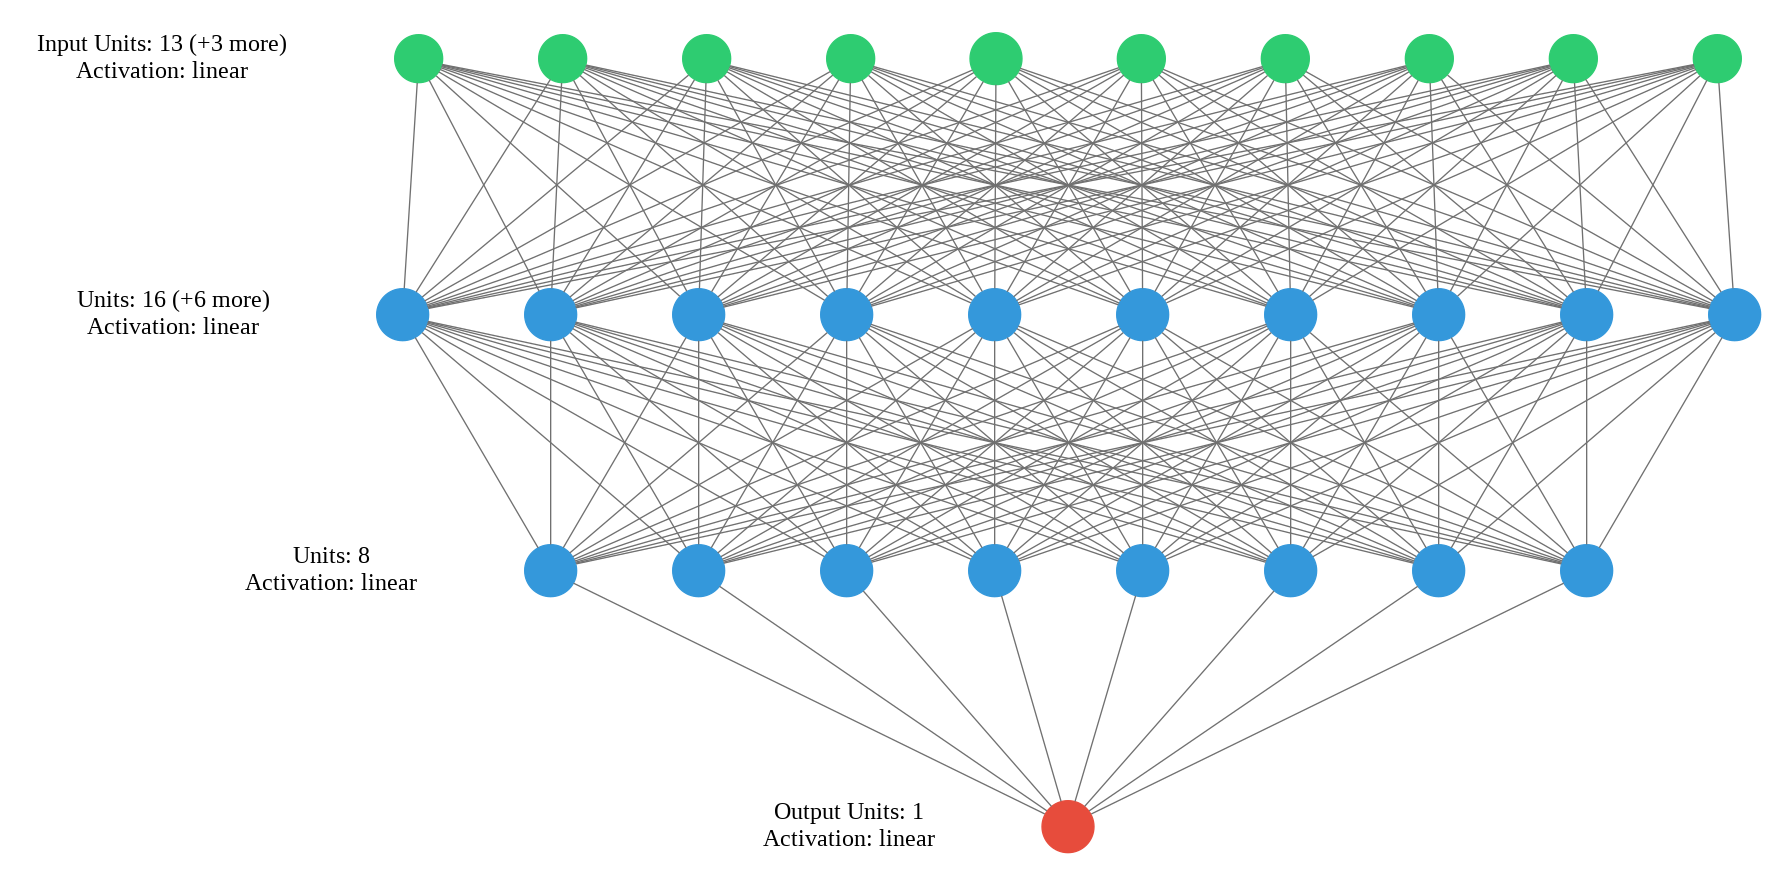

In [47]:
import keras_visualizer
keras_visualizer.visualizer(model,file_name='mygraph1',file_format='png')
from IPython.display import Image, display

display(Image('mygraph1.png'))

In [50]:
# Train the model
history = model.fit(
    x_train_scaled,y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 56634900480.0000 - mse: 56634900480.0000 - val_loss: 56857894912.0000 - val_mse: 56857894912.0000
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 55729901568.0000 - mse: 55729901568.0000 - val_loss: 56791031808.0000 - val_mse: 56791031808.0000
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 55579820032.0000 - mse: 55579820032.0000 - val_loss: 56637259776.0000 - val_mse: 56637259776.0000
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 56111190016.0000 - mse: 56111190016.0000 - val_loss: 56359211008.0000 - val_mse: 56359211008.0000
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 54812278784.0000 - mse: 54812278784.0000 - val_loss: 55928496128.0000 - val_mse: 55928496128.0000
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55347916800.0000 - mse: 55347916800.0000 - val_loss: 55309185024.0000 - val_mse: 55309185024.0000
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [52]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
  plt.plot(history.history['loss'], label='train Loss')
  plt.plot(history.history['val_loss'], label='val Loss')

  plt.xlabel('epoch')
  plt.ylabel('loss')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-1598425839.py", line 1, in <cell line: 0>
    plot_loss_curve(history)
  File "/tmp/ipython-input-1545525228.py", line 9, in plot_loss_curve
    plot_loss_curve(history)
  File "/tmp/ipython-input-1545525228.py", line 9, in plot_loss_curve
    plot_loss_curve(history)
  File "/tmp/ipython-input-1545525228.py", line 9, in plot_loss_curve
    plot_loss_curve(history)
  [Previous line repeated 19426 more times]
  File "/tmp/ipython-input-1545525228.py", line 5, in plot_loss_curve
    plt.plot(history.history['val_loss'], label='val Loss')
  File "/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py", line 3829, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py", line 1777, in plot
    li

TypeError: object of type 'NoneType' has no len()

Error in callback <function _draw_all_if_interactive at 0x7929c271c400> (for post_execute):


KeyboardInterrupt: 

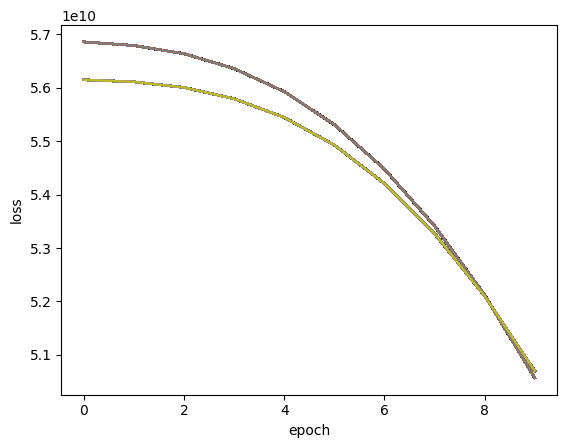

In [53]:
#plot_loss_curve(history)

In [54]:
paraminf = "13-ip, 16-n, 8-n, lss-mse met-mse, 10-ep, 32-bs"
record_result(model,paraminf)
display(results)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
performance res
mse 49260839297.63667
r2 <function r2_score at 0x7929976ba3e0>


Model           MSE  RMSE  R2 Score
0                          LinearRegression()  4.908477e+09   NaN       NaN
1  <Sequential name=sequential_3, built=True>  4.926084e+10   NaN       NaN

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 55997698048.0000 - mse: 55997698048.0000 - val_loss: 56859156480.0000 - val_mse: 56859156480.0000
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 56569364480.0000 - mse: 56569364480.0000 - val_loss: 56791916544.0000 - val_mse: 56791916544.0000
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 54766039040.0000 - mse: 54766039040.0000 - val_loss: 56616947712.0000 - val_mse: 56616947712.0000
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 55651737600.0000 - mse: 55651737600.0000 - val_loss: 56277905408.0000 - val_mse: 56277905408.0000
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55528472576.0000 - mse: 55528472576.0000 - val_loss: 55725027328.0000 - val_mse: 55725027328.0000
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54499205120.0000 - mse: 54499205120.0000 - val_loss: 54911250432.0000 - val_mse: 54911250432.0000
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

Exception ignored in: 'zmq.backend.cython._zmq.Frame.__del__'
Traceback (most recent call last):
  File "_zmq.py", line 160, in zmq.backend.cython._zmq._check_rc
KeyboardInterrupt: 


KeyboardInterrupt: 

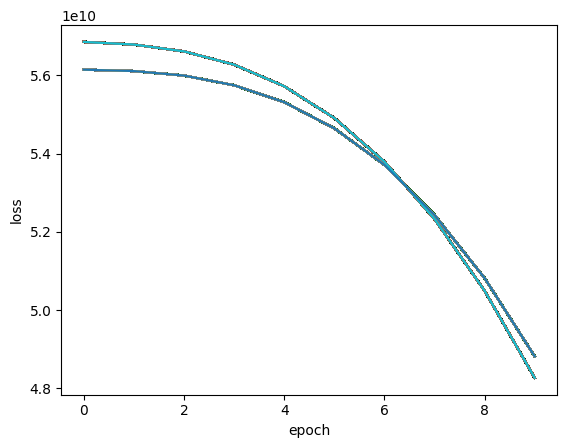

In [55]:
#build model
model = Sequential()

model.add(Input(shape=(x_train_scaled.shape[1],)))

model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='linear'))

#compile the model
model.compile(loss='mean_squared_error',
    metrics=['mse'])

print(model.summary())

# Train the model
history = model.fit(
    x_train_scaled,y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

plot_loss_curve(history)

In [56]:
# Train the model
history = model.fit(
    x_train_scaled,y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46166077440.0000 - mse: 46166077440.0000 - val_loss: 45650825216.0000 - val_mse: 45650825216.0000
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 44531073024.0000 - mse: 44531073024.0000 - val_loss: 42674659328.0000 - val_mse: 42674659328.0000
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 40853786624.0000 - mse: 40853786624.0000 - val_loss: 39353229312.0000 - val_mse: 39353229312.0000
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 38527827968.0000 - mse: 38527827968.0000 - val_loss: 35765366784.0000 - val_mse: 35765366784.0000
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34208589824.0000 - mse: 34208589824.0000 - val_loss: 31970973696.0000 - val_mse: 31970973696.0000
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31173562368.0000 - mse: 31173562368.0000 - val_loss: 28096747520.0000 - val_mse: 28096747520.0000
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [58]:
paraminf = "13-ip, 16-n, 8-n, act=relu, lss-mse met-mse, 10-ep, 32-bs"
record_result(model,paraminf)
display(results)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
performance res
mse 13947390913.722057
r2 <function r2_score at 0x7929976ba3e0>


Model           MSE  RMSE  R2 Score
0                          LinearRegression()  4.908477e+09   NaN       NaN
1  <Sequential name=sequential_3, built=True>  4.926084e+10   NaN       NaN
2  <Sequential name=sequential_4, built=True>  1.394739e+10   NaN       NaN
3  <Sequential name=sequential_4, built=True>  1.394739e+10   NaN       NaN

In [60]:
from keras.optimizers import Adam
#build model
model = Sequential()

model.add(Input(shape=(x_train_scaled.shape[1],)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

#compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
    metrics=['mse'])

print(model.summary())

# Train the model
history = model.fit(
    x_train_scaled,y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

#plot_loss_curve(history)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 43393392640.0000 - mse: 43393392640.0000 - val_loss: 7472676864.0000 - val_mse: 7472676864.0000
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6613968384.0000 - mse: 6613968384.0000 - val_loss: 5483905024.0000 - val_mse: 5483905024.0000
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5075703808.0000 - mse: 5075703808.0000 - val_loss: 5031920640.0000 - val_mse: 5031920640.0000
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4709000704.0000 - mse: 4709000704.0000 - val_loss: 4867777536.0000 - val_mse: 4867777536.0000
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4565713920.0000 - mse: 4565713920.0000 - val_loss: 4728975872.0000 - val_mse: 4728975872.0000
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4325573120.0000 - mse: 4325573120.0000 - val_loss: 4685855232.0000 - val_mse: 4685855232.0000
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 440390860

In [61]:
paraminf = "13-ip, 64-n, 32-n, act-relu, opt-adam, lss-mse met-mse, 10-ep, 32-bs"
record_result(model,paraminf)
display(results)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
performance res
mse 4034100378.1417503
r2 <function r2_score at 0x7929976ba3e0>


Model           MSE  RMSE  R2 Score
0                          LinearRegression()  4.908477e+09   NaN       NaN
1  <Sequential name=sequential_3, built=True>  4.926084e+10   NaN       NaN
2  <Sequential name=sequential_4, built=True>  1.394739e+10   NaN       NaN
3  <Sequential name=sequential_4, built=True>  1.394739e+10   NaN       NaN
4  <Sequential name=sequential_6, built=True>  4.034100e+09   NaN       NaN

In [62]:
#build model
model = Sequential()

model.add(Input(shape=(x_train_scaled.shape[1],)))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

#compile the model
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error',
    metrics=['mse'])

print(model.summary())

# Train the model
history = model.fit(
    x_train_scaled,y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

#plot_loss_curve(history)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 43872243712.0000 - mse: 43872243712.0000 - val_loss: 7784733184.0000 - val_mse: 7784733184.0000
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6701345280.0000 - mse: 6701345280.0000 - val_loss: 5593053184.0000 - val_mse: 5593053184.0000
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5259626496.0000 - mse: 5259626496.0000 - val_loss: 5072318464.0000 - val_mse: 5072318464.0000
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4877339136.0000 - mse: 4877339136.0000 - val_loss: 4885331968.0000 - val_mse: 4885331968.0000
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4602988032.0000 - mse: 4602988032.0000 - val_loss: 4749174784.0000 - val_mse: 4749174784.0000
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4417680384.0000 - mse: 4417680384.0000 - val_loss: 4678359040.0000 - val_mse: 4678359040.0000
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 425958246

In [63]:
paraminf = "13-ip, 64-n, 32-n, act-relu, opt-adam-lr0.01, lss-mse met-mse, 50-ep, 32-bs"
record_result(model,paraminf)
display(results)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
performance res
mse 4197071415.6124005
r2 <function r2_score at 0x7929976ba3e0>


Model           MSE  RMSE  R2 Score
0                          LinearRegression()  4.908477e+09   NaN       NaN
1  <Sequential name=sequential_3, built=True>  4.926084e+10   NaN       NaN
2  <Sequential name=sequential_4, built=True>  1.394739e+10   NaN       NaN
3  <Sequential name=sequential_4, built=True>  1.394739e+10   NaN       NaN
4  <Sequential name=sequential_6, built=True>  4.034100e+09   NaN       NaN
5  <Sequential name=sequential_7, built=True>  4.197071e+09   NaN       NaN

In [64]:
pd.set_option('display.max_colwidth',None)
display(results)

Model           MSE  RMSE  R2 Score
0                          LinearRegression()  4.908477e+09   NaN       NaN
1  <Sequential name=sequential_3, built=True>  4.926084e+10   NaN       NaN
2  <Sequential name=sequential_4, built=True>  1.394739e+10   NaN       NaN
3  <Sequential name=sequential_4, built=True>  1.394739e+10   NaN       NaN
4  <Sequential name=sequential_6, built=True>  4.034100e+09   NaN       NaN
5  <Sequential name=sequential_7, built=True>  4.197071e+09   NaN       NaN